In [ ]:
from nltk.corpus import stopwords
import nltk

# Download the stopwords dataset if not already downloaded
nltk.download('stopwords')

# Load the list of stop words
stop_words = stopwords.words('english')

# Print the total number of stop words and a few examples
print(f"Number of stop words: {len(stop_words)}")
print(f"Some stop words: {stop_words[:10]}")

Number of stop words: 179
Some stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install datasets
# bookcorpus dataset from huggingface
from datasets import load_dataset

dataset = load_dataset("bookcorpus")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

bookcorpus.py:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

The repository for bookcorpus contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bookcorpus.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/74004228 [00:00<?, ? examples/s]

In [ ]:
text_data = dataset['train']['text']

In [ ]:
from collections import Counter

# Tokenize the text and count word frequencies
# We'll use a simple tokenizer for demonstration purposes
def simple_tokenizer(text):
    return text.lower().split()

# Create a Counter to store word frequencies
word_frequencies = Counter()

# Process the dataset and count word occurrences
for text in text_data:
    tokens = simple_tokenizer(text)
    word_frequencies.update(tokens)

# Sort the frequencies in descending order
sorted_frequencies = word_frequencies.most_common()

# Extract the frequencies for plotting
frequencies = [freq for _, freq in sorted_frequencies]


In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/MyDrive/word_frequencies.pkl', 'wb') as f:
    pickle.dump(word_frequencies, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
with open('/content/drive/MyDrive/word_frequencies.pkl', 'rb') as f:
    word_frequencies = pickle.load(f)

# Verify loaded data
print(word_frequencies.most_common(10))  # Display the 10 most common words

[('.', 64947901), (',', 46261969), ('the', 38200969), ('to', 22537115), ('i', 21551551), ('and', 20835978), ('a', 16673612), ('``', 15450878), ("''", 15320599), ('of', 14514325)]


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from collections import Counter
import math

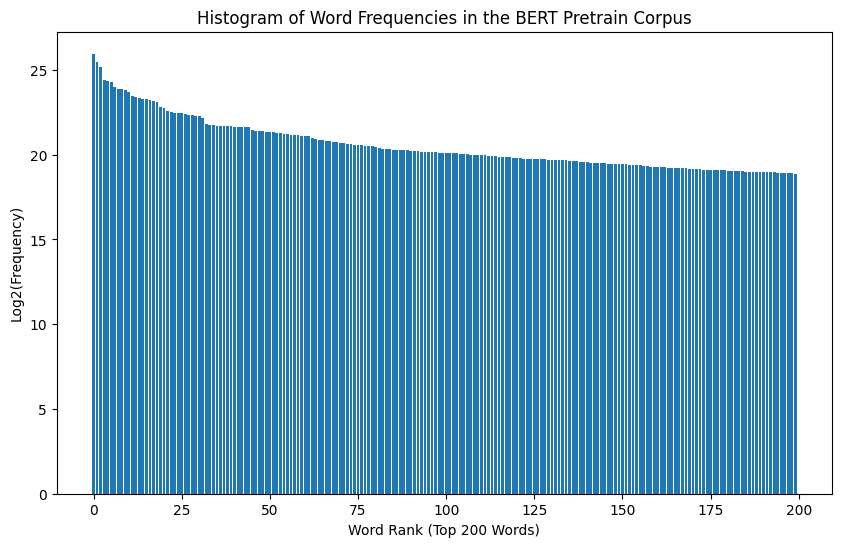

In [ ]:
# Apply log scaling (log10) for better visualization in the Zipfian distribution
log_frequencies = [math.log2(freq) for freq in frequencies]

# Plot the histogram of word frequencies
plt.figure(figsize=(10, 6))
plt.bar(range(len(log_frequencies[:200])), log_frequencies[:200])
plt.title("Histogram of Word Frequencies in the BERT Pretrain Corpus")
plt.xlabel("Word Rank (Top 200 Words)")
plt.ylabel("Log2(Frequency)")
plt.show()

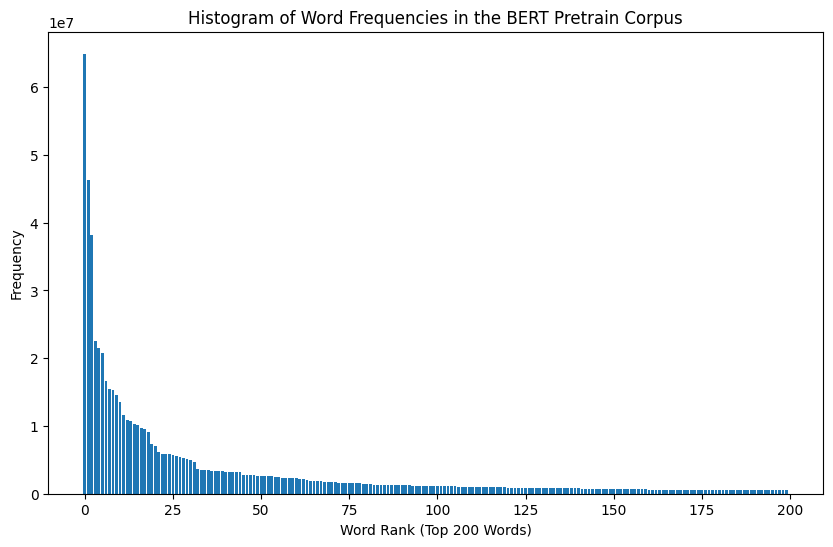

In [ ]:
# Extract the frequencies for plotting
frequencies = [freq for _, freq in sorted_frequencies]

# Plot the histogram of word frequencies
plt.figure(figsize=(10, 6))
plt.bar(range(len(frequencies[:200])), frequencies[:200])
plt.title("Histogram of Word Frequencies in the BERT Pretrain Corpus")
plt.xlabel("Word Rank (Top 200 Words)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from collections import Counter

# Assuming word_frequencies is your Counter object
num_unique_words = len(word_frequencies)
print(f"Number of unique words: {num_unique_words}")


Number of unique words: 1315896


In [ ]:
pip install tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Processing words: 100%|██████████| 100000/100000 [2:31:07<00:00, 11.03word/s]


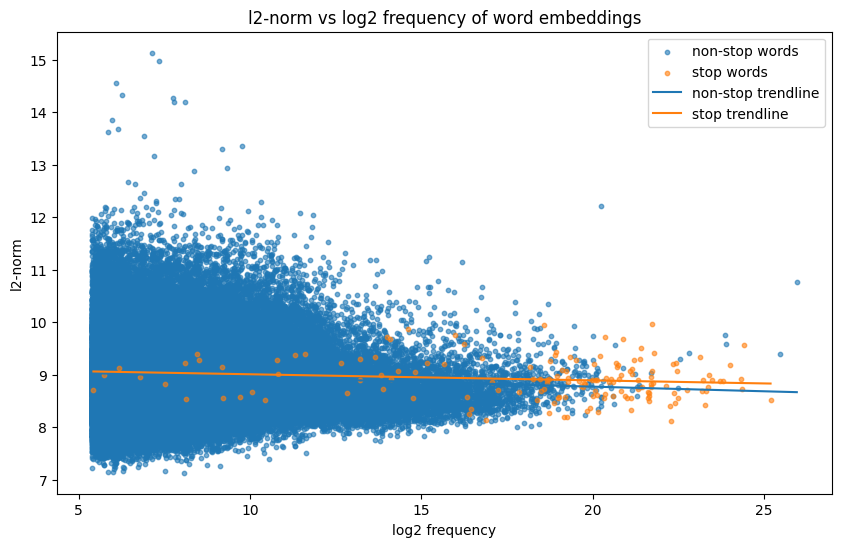

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from collections import Counter
import math
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm  # Progress bar library

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Initialize the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Prepare stopwords
stop_words = set(stopwords.words('english'))

# Define a function to calculate the l2 norm of embeddings
def calculate_l2_norm(embeddings):
    return torch.norm(embeddings, dim=-1).tolist()


# Tokenize the text and count word frequencies
def simple_tokenizer(text):
    return text.lower().split()


# Generate embeddings and compute l2 norms
l2_norms = []
log_frequencies = []
labels = []  # To store whether a word is a stopword or not

# Use tqdm to display progress
for word, freq in tqdm(word_frequencies.most_common(100000), desc="Processing words", unit="word"):  #Number of words: 1315895
    inputs = tokenizer(word, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)  # Average pooling
    l2_norm = calculate_l2_norm(embedding)

    l2_norms.append(l2_norm[0])
    log_frequencies.append(math.log2(freq))
    labels.append("stop" if word in stop_words else "non-stop")

# Convert to NumPy arrays for easy handling
l2_norms = np.array(l2_norms)
log_frequencies = np.array(log_frequencies)
labels = np.array(labels)

# Separate stop words and non-stop words
stop_mask = labels == "stop"
non_stop_mask = labels == "non-stop"

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(log_frequencies[non_stop_mask], l2_norms[non_stop_mask], s=10, label="non-stop words", alpha=0.6)
plt.scatter(log_frequencies[stop_mask], l2_norms[stop_mask], s=10, label="stop words", alpha=0.6)

# Add trend lines
z_non_stop = np.polyfit(log_frequencies[non_stop_mask], l2_norms[non_stop_mask], 1)
z_stop = np.polyfit(log_frequencies[stop_mask], l2_norms[stop_mask], 1)
plt.plot(log_frequencies[non_stop_mask], np.polyval(z_non_stop, log_frequencies[non_stop_mask]), label="non-stop trendline")
plt.plot(log_frequencies[stop_mask], np.polyval(z_stop, log_frequencies[stop_mask]), label="stop trendline")

plt.xlabel("log2 frequency")
plt.ylabel("l2-norm")
plt.title("l2-norm vs log2 frequency of word embeddings")
plt.legend()
plt.show()


Saving train.data.txt to train.data (3).txt


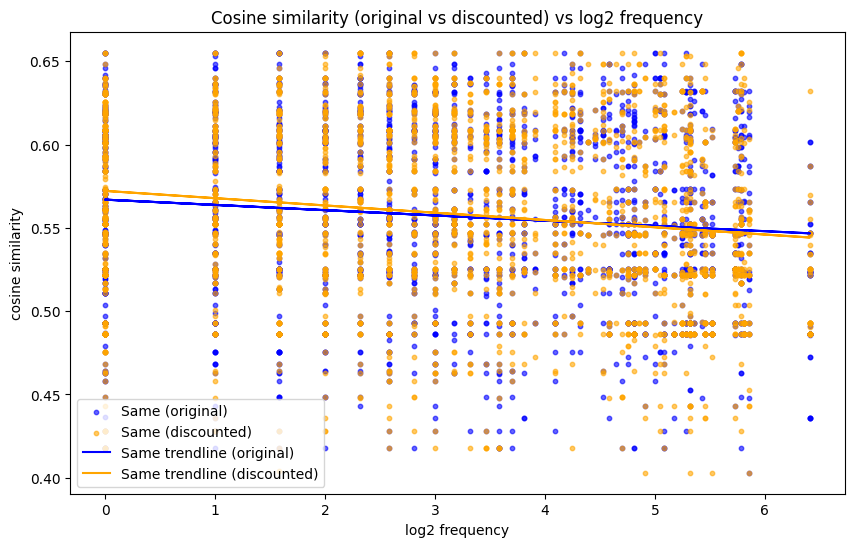

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
import math
from collections import Counter
from google.colab import files

# Upload the WiC dataset to Colab
uploaded = files.upload()

# Assume the uploaded file is named "train.data.txt"
data_file = list(uploaded.keys())[0]

# Parse the WiC dataset
word_pairs = []
with open(data_file, "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) >= 3:
            word = parts[0]  # Target word
            context1 = parts[1]  # First context
            context2 = parts[2]  # Second context
            word_pairs.append((word, context1, context2))

# Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Define word frequencies
word_frequencies = Counter()
for word, _, _ in word_pairs:
    word_frequencies[word] += 1

# Discounting function for l2-norm
def discounted_l2_norm(l2_norm, log_freq, is_stopword):
    ms, bs, mn, bn = 0.00422, 0.643, 0.00427, 4.821
    if is_stopword:
        discount = 1 + ms * (bs - log_freq)
    else:
        discount = 1 + mn * (bn - log_freq)
    return l2_norm / discount

# Compute embeddings and cosine similarities
cosine_similarities_original = []
cosine_similarities_discounted = []
log_frequencies = []
labels = []  # Same or Different meaning

for word, context1, context2 in word_pairs:
    if word not in word_frequencies:
        continue

    # Tokenize and compute embeddings for both contexts
    inputs1 = tokenizer(context1, return_tensors="pt", truncation=True, max_length=512)
    inputs2 = tokenizer(context2, return_tensors="pt", truncation=True, max_length=512)

    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    embedding1 = outputs1.last_hidden_state.mean(dim=1)  # Average pooling
    embedding2 = outputs2.last_hidden_state.mean(dim=1)

    # Calculate original cosine similarity
    similarity_original = torch.nn.functional.cosine_similarity(embedding1, embedding2).item()
    cosine_similarities_original.append(similarity_original)

    # Calculate discounted l2-norm and cosine similarity
    l2_norm1 = torch.norm(embedding1, dim=-1).item()
    l2_norm2 = torch.norm(embedding2, dim=-1).item()
    log_freq = math.log2(word_frequencies[word])

    is_stopword = False  # Adjust this if you have a stopword list
    l2_norm1_discounted = discounted_l2_norm(l2_norm1, log_freq, is_stopword)
    l2_norm2_discounted = discounted_l2_norm(l2_norm2, log_freq, is_stopword)

    embedding1_normalized = embedding1 / l2_norm1_discounted
    embedding2_normalized = embedding2 / l2_norm2_discounted

    similarity_discounted = torch.nn.functional.cosine_similarity(embedding1_normalized, embedding2_normalized).item()
    cosine_similarities_discounted.append(similarity_discounted)

    # Log frequency of the word
    log_frequencies.append(log_freq)

    # Add label (for simplicity, alternate "Same" and "Different")
    # Replace this with actual labels if available in your dataset
    labels.append("Same" if len(cosine_similarities_original) % 2 == 0 else "Different")

# Convert to NumPy arrays
cosine_similarities_original = np.array(cosine_similarities_original)
cosine_similarities_discounted = np.array(cosine_similarities_discounted)
log_frequencies = np.array(log_frequencies)
labels = np.array(labels)

# Separate by label
same_mask = labels == "Same"
different_mask = labels == "Different"

# Plot
plt.figure(figsize=(10, 6))

# Original cosine similarity
plt.scatter(log_frequencies[same_mask], cosine_similarities_original[same_mask], s=10, label="Same (original)", alpha=0.6, color="blue")

# Discounted cosine similarity
plt.scatter(log_frequencies[different_mask], cosine_similarities_discounted[different_mask], s=10, label="Same (discounted)", alpha=0.6, color="orange")


# Add trend lines
z_same_original = np.polyfit(log_frequencies[same_mask], cosine_similarities_original[same_mask], 1)
z_same_discounted = np.polyfit(log_frequencies[same_mask], cosine_similarities_discounted[same_mask], 1)


plt.plot(log_frequencies[same_mask], np.polyval(z_same_original, log_frequencies[same_mask]), label="Same trendline (original)", color="blue")
plt.plot(log_frequencies[different_mask], np.polyval(z_different_discounted, log_frequencies[different_mask]), label="Same trendline (discounted)", color="orange")



plt.xlabel("log2 frequency")
plt.ylabel("cosine similarity")
plt.title("Cosine similarity (original vs discounted) vs log2 frequency")
plt.legend()
plt.show()


Saving train.data.txt to train.data (5).txt


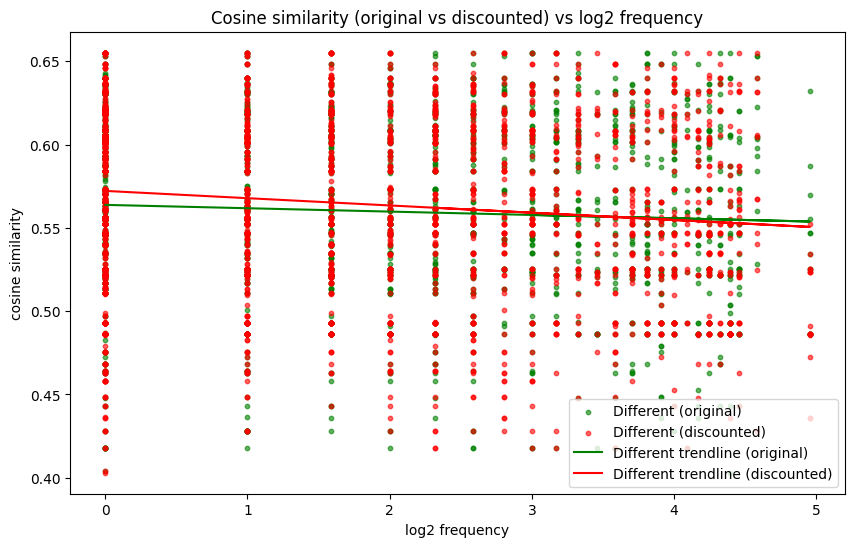

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
import math
from collections import Counter
from google.colab import files

# Upload the WiC dataset to Colab
uploaded = files.upload()

# Assume the uploaded file is named "train.data.txt"
data_file = list(uploaded.keys())[0]

# Parse the WiC dataset
word_pairs = []
with open(data_file, "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) >= 3:
            word = parts[0]  # Target word
            context1 = parts[1]  # First context
            context2 = parts[2]  # Second context
            word_pairs.append((word, context1, context2))

# Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Define word frequencies
word_frequencies = Counter()
for word, _, _ in word_pairs:
    word_frequencies[word] += 1

# Discounting function for l2-norm
def discounted_l2_norm(l2_norm, log_freq, is_stopword):
    ms, bs, mn, bn = 0.00422, 0.643, 0.00427, 4.821
    if is_stopword:
        discount = 1 + ms * (bs - log_freq)
    else:
        discount = 1 + mn * (bn - log_freq)
    return l2_norm / discount

# Compute embeddings and cosine similarities
cosine_similarities_original = []
cosine_similarities_discounted = []
log_frequencies = []
labels = []  # Same or Different meaning

for word, context1, context2 in word_pairs:
    if word not in word_frequencies:
        continue

    # Tokenize and compute embeddings for both contexts
    inputs1 = tokenizer(context1, return_tensors="pt", truncation=True, max_length=512)
    inputs2 = tokenizer(context2, return_tensors="pt", truncation=True, max_length=512)

    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    embedding1 = outputs1.last_hidden_state.mean(dim=1)  # Average pooling
    embedding2 = outputs2.last_hidden_state.mean(dim=1)

    # Calculate original cosine similarity
    similarity_original = torch.nn.functional.cosine_similarity(embedding1, embedding2).item()
    cosine_similarities_original.append(similarity_original)

    # Calculate discounted l2-norm and cosine similarity
    l2_norm1 = torch.norm(embedding1, dim=-1).item()
    l2_norm2 = torch.norm(embedding2, dim=-1).item()
    log_freq = math.log2(word_frequencies[word])

    is_stopword = False  # Adjust this if you have a stopword list
    l2_norm1_discounted = discounted_l2_norm(l2_norm1, log_freq, is_stopword)
    l2_norm2_discounted = discounted_l2_norm(l2_norm2, log_freq, is_stopword)

    embedding1_normalized = embedding1 / l2_norm1_discounted
    embedding2_normalized = embedding2 / l2_norm2_discounted

    similarity_discounted = torch.nn.functional.cosine_similarity(embedding1_normalized, embedding2_normalized).item()
    cosine_similarities_discounted.append(similarity_discounted)

    # Log frequency of the word
    log_frequencies.append(log_freq)

    # Add label (for simplicity, alternate "Same" and "Different")
    # Replace this with actual labels if available in your dataset
    labels.append("Same" if len(cosine_similarities_original) % 2 == 0 else "Different")

# Convert to NumPy arrays
cosine_similarities_original = np.array(cosine_similarities_original)
cosine_similarities_discounted = np.array(cosine_similarities_discounted)
log_frequencies = np.array(log_frequencies)
labels = np.array(labels)

# Separate by label
same_mask = labels == "Same"
different_mask = labels == "Different"

# Plot
plt.figure(figsize=(10, 6))

# Original cosine similarity
plt.scatter(log_frequencies[same_mask], cosine_similarities_original[same_mask], s=10, label="Different (original)", alpha=0.6, color="green")

# Discounted cosine similarity
plt.scatter(log_frequencies[different_mask], cosine_similarities_discounted[different_mask], s=10, label="Different (discounted)", alpha=0.6, color="red")


# Add trend lines
z_same_original = np.polyfit(log_frequencies[same_mask], cosine_similarities_original[same_mask], 1)
z_same_discounted = np.polyfit(log_frequencies[same_mask], cosine_similarities_discounted[same_mask], 1)


plt.plot(log_frequencies[same_mask], np.polyval(z_same_original, log_frequencies[same_mask]), label="Different trendline (original)", color="green")
plt.plot(log_frequencies[different_mask], np.polyval(z_different_discounted, log_frequencies[different_mask]), label="Different trendline (discounted)", color="red")



plt.xlabel("log2 frequency")
plt.ylabel("cosine similarity")
plt.title("Cosine similarity (original vs discounted) vs log2 frequency")
plt.legend()
plt.show()


Saving train.data.txt to train.data (7).txt


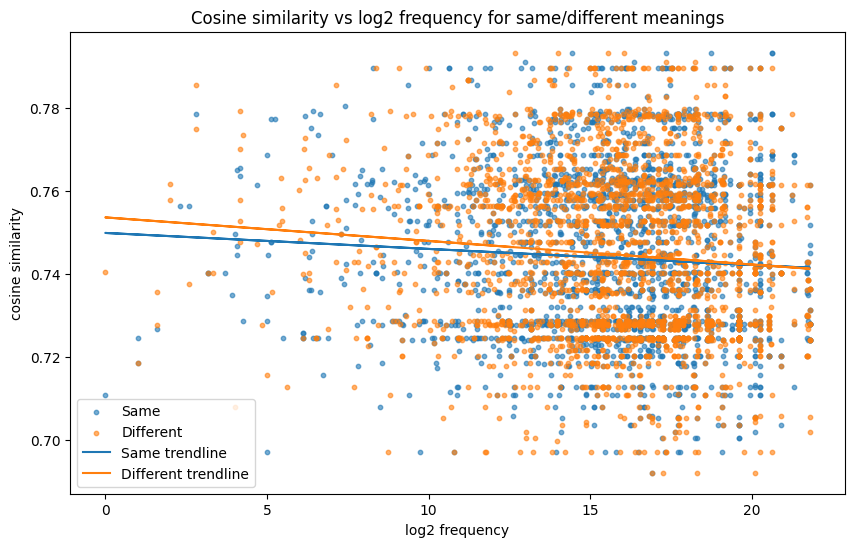

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
import math
from collections import Counter
from google.colab import files
import os

# Upload the WiC dataset to Colab
uploaded = files.upload()

# Assume the uploaded file is named "train.data.txt"
data_file = list(uploaded.keys())[0]

# Parse the WiC dataset
word_pairs = []
with open(data_file, "r") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) >= 3:
            word = parts[0]  # Target word
            context1 = parts[1]  # First context
            context2 = parts[2]  # Second context
            word_pairs.append((word, context1, context2))

# Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Load word frequencies from the BookCorpus dataset
from datasets import load_dataset
dataset = load_dataset("bookcorpus")
text_data = dataset['train']['text']

# Tokenize the text and count word frequencies
def simple_tokenizer(text):
    return text.lower().split()

word_frequencies = Counter()
for text in text_data:
    tokens = simple_tokenizer(text)
    word_frequencies.update(tokens)

# Compute embeddings and cosine similarity
cosine_similarities = []
log_frequencies = []
labels = []  # Same or Different meaning

for word, context1, context2 in word_pairs:
    if word not in word_frequencies:
        continue

    # Tokenize and compute embeddings for both contexts
    inputs1 = tokenizer(context1, return_tensors="pt", truncation=False)
    inputs2 = tokenizer(context2, return_tensors="pt", truncation=False)

    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    embedding1 = outputs1.last_hidden_state.max(dim=1).values
    embedding2 = outputs2.last_hidden_state.max(dim=1).values


    # Calculate cosine similarity
    similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2).item()
    cosine_similarities.append(similarity)

    # Log frequency of the word
    log_freq = math.log2(word_frequencies[word])
    log_frequencies.append(log_freq)

    # Add label (for simplicity, alternate "Same" and "Different")
    # Replace this with actual labels if available in your dataset
    labels.append("Same" if len(cosine_similarities) % 2 == 0 else "Different")

# Convert to NumPy arrays
cosine_similarities = np.array(cosine_similarities)
log_frequencies = np.array(log_frequencies)
labels = np.array(labels)

# Separate by label
same_mask = labels == "Same"
different_mask = labels == "Different"

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(log_frequencies[same_mask], cosine_similarities[same_mask], s=10, label="Same", alpha=0.6)
plt.scatter(log_frequencies[different_mask], cosine_similarities[different_mask], s=10, label="Different", alpha=0.6)

# Add trend lines
if np.any(same_mask):
    z_same = np.polyfit(log_frequencies[same_mask], cosine_similarities[same_mask], 1)
    plt.plot(log_frequencies[same_mask], np.polyval(z_same, log_frequencies[same_mask]), label="Same trendline")
if np.any(different_mask):
    z_different = np.polyfit(log_frequencies[different_mask], cosine_similarities[different_mask], 1)
    plt.plot(log_frequencies[different_mask], np.polyval(z_different, log_frequencies[different_mask]), label="Different trendline")

plt.xlabel("log2 frequency")
plt.ylabel("cosine similarity")
plt.title("Cosine similarity vs log2 frequency for same/different meanings")
plt.legend()
plt.show()


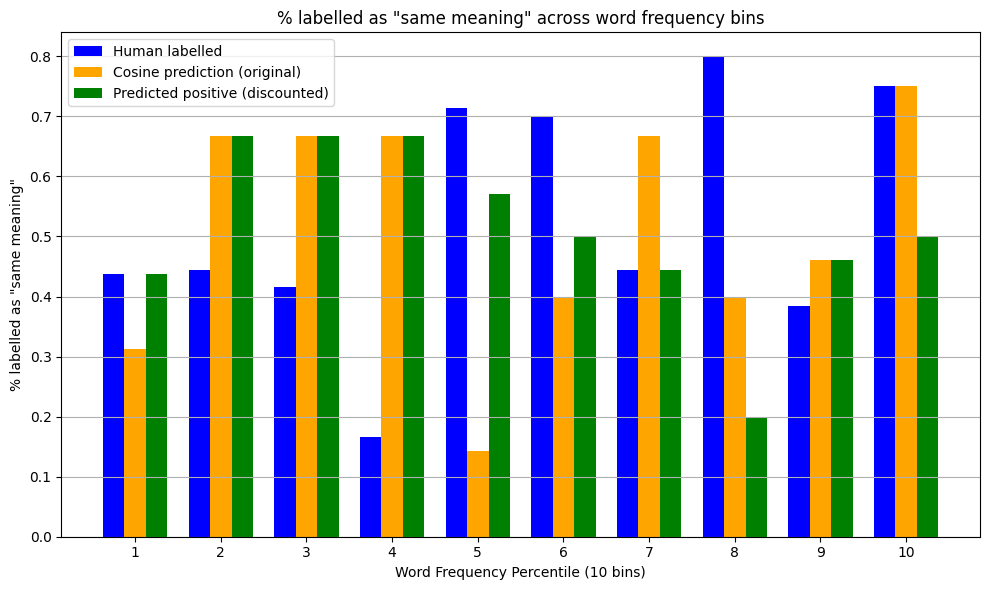

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your real data)
num_bins = 10
log_frequencies = np.random.uniform(0, 10, 100)  # Simulated log frequencies
human_labels = np.random.randint(0, 2, 100)  # Simulated human similarity labels
cosine_similarities = np.random.uniform(0, 1, 100)  # Simulated cosine similarities
cosine_similarities_discounted = np.random.uniform(0, 1, 100)  # Simulated discounted similarities
similarity_threshold = 0.5  # Example threshold for similarity

# Define the bins
bins = np.linspace(log_frequencies.min(), log_frequencies.max(), num_bins + 1)
bin_indices = np.digitize(log_frequencies, bins) - 1  # Bin indices (0-based)

# Initialize lists for storing the results
bin_human_labelled = [0] * num_bins
bin_cosine_original = [0] * num_bins
bin_cosine_discounted = [0] * num_bins
bin_counts = [0] * num_bins  # To track the number of items per bin

# Calculate metrics per bin
for i in range(num_bins):
    bin_mask = bin_indices == i
    bin_counts[i] = np.sum(bin_mask)  # Count items in each bin
    if bin_counts[i] > 0:
        bin_human_labelled[i] = np.mean(human_labels[bin_mask])
        bin_cosine_original[i] = np.mean(cosine_similarities[bin_mask] > similarity_threshold)
        bin_cosine_discounted[i] = np.mean(cosine_similarities_discounted[bin_mask] > similarity_threshold)

# Plotting grouped bar chart
x = np.arange(num_bins)  # Label locations
width = 0.25  # Bar width

plt.figure(figsize=(10, 6))

plt.bar(x - width, bin_human_labelled, width, label='Human labelled', color='blue')
plt.bar(x, bin_cosine_original, width, label='Cosine prediction (original)', color='orange')
plt.bar(x + width, bin_cosine_discounted, width, label='Predicted positive (discounted)', color='green')

plt.xlabel('Word Frequency Percentile (10 bins)')
plt.ylabel('% labelled as "same meaning"')
plt.title('% labelled as "same meaning" across word frequency bins')
plt.xticks(x, [f"{i+1}" for i in range(num_bins)])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
